# 1.Loading libraries and Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pickle

#import the necessary modelling algos.
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import dataset

df = pd.read_csv(r"D:\Data Science\Projects\Car Price\CAR_DETAILS.csv")
df.shape

(3537, 8)

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
4,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


# 2.Data Inspection & Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3537 non-null   object
 1   year           3537 non-null   int64 
 2   selling_price  3537 non-null   int64 
 3   km_driven      3537 non-null   int64 
 4   fuel           3537 non-null   object
 5   seller_type    3537 non-null   object
 6   transmission   3537 non-null   object
 7   owner          3537 non-null   object
dtypes: int64(3), object(5)
memory usage: 221.2+ KB


In [5]:
#Let's convert some of the columns to appropriate datatype

df['fuel'] = df['fuel'].astype('category')
df['seller_type'] = df['seller_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['owner'] = df['owner'].astype('category')
df['name'] = df['name'].astype('category')

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           3537 non-null   category
 1   year           3537 non-null   int64   
 2   selling_price  3537 non-null   int64   
 3   km_driven      3537 non-null   int64   
 4   fuel           3537 non-null   category
 5   seller_type    3537 non-null   category
 6   transmission   3537 non-null   category
 7   owner          3537 non-null   category
dtypes: category(5), int64(3)
memory usage: 101.3 KB


In [7]:
#Overview of data
#Show no. of None values

print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [8]:
#Checking for duplicated entries

sum(df.duplicated(df.columns))

651

In [9]:
#Delete the duplicates and check that it worked

df = df.drop_duplicates(df.columns)
print(sum(df.duplicated(df.columns)))

0


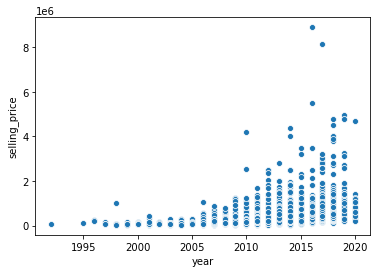

In [10]:
sns.scatterplot(x = 'year', y = 'selling_price', data = df)

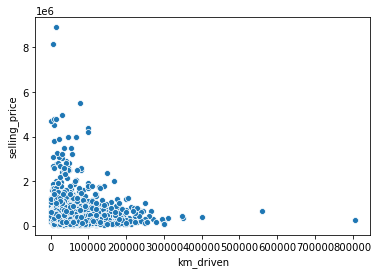

In [11]:
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = df)

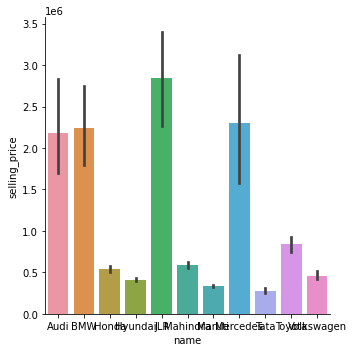

In [12]:
sns.catplot(x = 'name', y = 'selling_price', data = df, kind = 'bar')

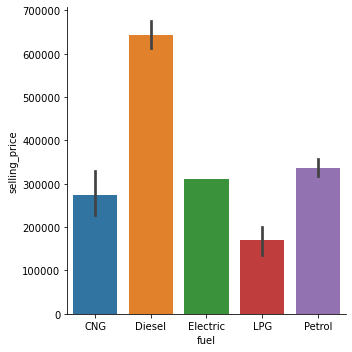

In [13]:
sns.catplot(x = 'fuel', y = 'selling_price', data = df, kind = 'bar')

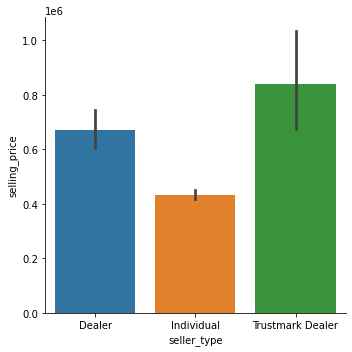

In [14]:
sns.catplot(x = 'seller_type', y = 'selling_price', data = df, kind = 'bar')

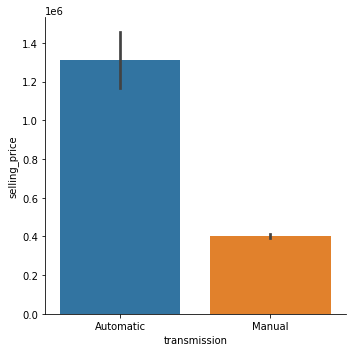

In [15]:
sns.catplot(x = 'transmission', y = 'selling_price', data = df, kind = 'bar')

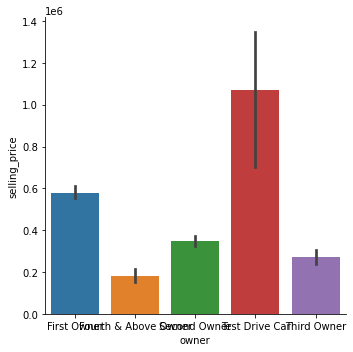

In [16]:
sns.catplot(x = 'owner', y = 'selling_price', data = df, kind = 'bar')

In [17]:
df['selling_price'].describe().apply("{0:.5f}".format)

count       2886.00000
mean      481701.48787
std       531019.79012
min        30000.00000
25%       200000.00000
50%       350000.00000
75%       600000.00000
max      8900000.00000
Name: selling_price, dtype: object

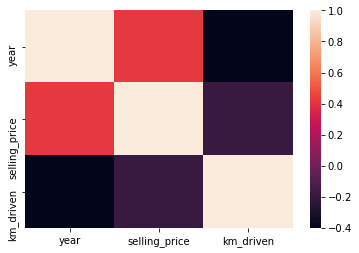

In [18]:
#correlation between the features
# Last row represents the correlation of different features with SALE PRICE

corr = df.corr()
sns.heatmap(corr)

In [19]:
#numeric correlation

corr['selling_price'].sort_values(ascending=False)

selling_price    1.000000
year             0.420428
km_driven       -0.188144
Name: selling_price, dtype: float64

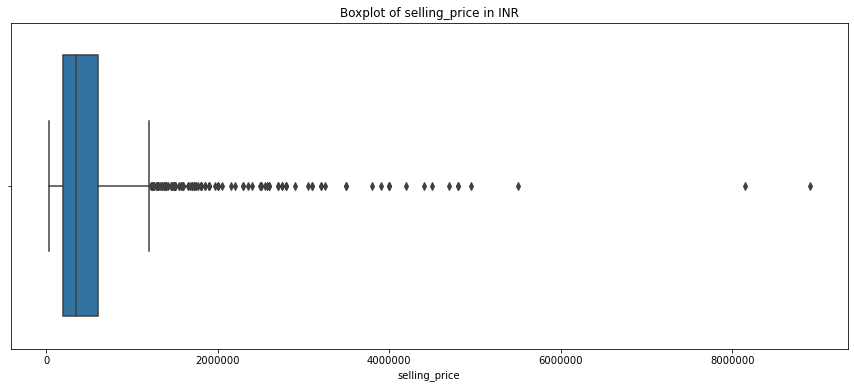

In [20]:
plt.figure(figsize=(15,6))

sns.boxplot(x='selling_price', data=df[['selling_price']])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of selling_price in INR')
plt.show()

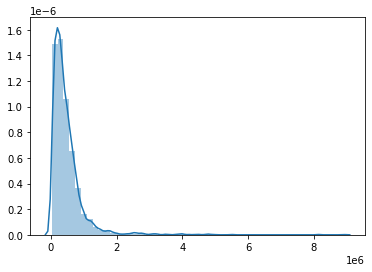

In [21]:
sns.distplot(df[['selling_price']])

In [22]:
# Remove observations that fall outside those caps

df = df[(df['selling_price'] > 100000) & (df['selling_price'] < 500000)]
print(df.shape)

(1588, 8)


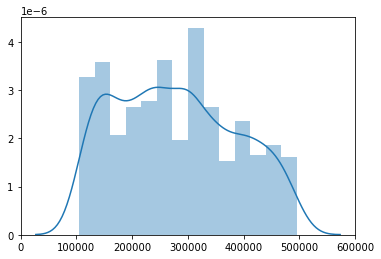

In [23]:
sns.distplot(df[['selling_price']])

In [24]:
df['selling_price'].describe().apply("{0:.5f}".format)

count      1588.00000
mean     278581.80856
std      107232.20547
min      105000.00000
25%      190000.00000
50%      270500.00000
75%      360000.00000
max      495000.00000
Name: selling_price, dtype: object

# 3. Data Pre Processing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 1 to 3535
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           1588 non-null   category
 1   year           1588 non-null   int64   
 2   selling_price  1588 non-null   int64   
 3   km_driven      1588 non-null   int64   
 4   fuel           1588 non-null   category
 5   seller_type    1588 non-null   category
 6   transmission   1588 non-null   category
 7   owner          1588 non-null   category
dtypes: category(5), int64(3)
memory usage: 58.4 KB


In [26]:
df['name'].value_counts()

Maruti        646
Hyundai       379
Tata          189
Mahindra      141
Honda         108
Volkswagen     63
Toyota         60
Mercedes        1
BMW             1
JLR             0
Audi            0
Name: name, dtype: int64

In [27]:
#Convert year and create age of the car in years
df['years_old'] = 2020 - df['year']

# Drop
df = df.drop('year',axis=1)

In [28]:
#Select the variables to be one-hot encoded

one_hot_features = ['name','fuel','seller_type','transmission','owner']

In [29]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).

one_hot_encoded = pd.get_dummies(df[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 1 to 3535
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   name_Audi                     1588 non-null   uint8
 1   name_BMW                      1588 non-null   uint8
 2   name_Honda                    1588 non-null   uint8
 3   name_Hyundai                  1588 non-null   uint8
 4   name_JLR                      1588 non-null   uint8
 5   name_Mahindra                 1588 non-null   uint8
 6   name_Maruti                   1588 non-null   uint8
 7   name_Mercedes                 1588 non-null   uint8
 8   name_Tata                     1588 non-null   uint8
 9   name_Toyota                   1588 non-null   uint8
 10  name_Volkswagen               1588 non-null   uint8
 11  fuel_CNG                      1588 non-null   uint8
 12  fuel_Diesel                   1588 non-null   uint8
 13  fuel_Electric                 158

In [30]:
# Replacing categorical columns with dummies

df = df.drop(one_hot_features,axis=1)
df = pd.concat([df, one_hot_encoded] ,axis=1)

In [31]:
df.head()

,selling_price,km_driven,years_old,name_Audi,name_BMW,name_Honda,name_Hyundai,name_JLR,name_Mahindra,name_Maruti,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1,135000,50000,13,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
3,450000,141000,6,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,140000,125000,13,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
6,240000,60000,6,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8,365000,78000,3,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0


### Train/Test Split

In [32]:
# Dependent and Independent Variables

X_df = df.drop('selling_price', axis=1)
Y_df = df['selling_price']

X_df.shape , Y_df.shape

((1588, 28), (1588,))

In [33]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_df , Y_df , test_size = 0.3 , random_state =34)

print(X_train.shape)
print(Y_train.shape)

(1111, 28)
(1111,)


# 4. Modelling

In [34]:
# Root mean squared error RMSE

def evaluate(y_test,y_pred):
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    return rmse,r2

In [35]:
rf_regr = RandomForestRegressor(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, 
                                max_depth = 40, n_jobs = -1)

rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)

rmse,r2 = evaluate(Y_test,Y_pred_rf)
print("RMSE = {} R2 SCORE = {}".format(rmse,r2))

RMSE = 76143.07074857375 R2 SCORE = 0.5148158313856297


# 5. Conclusion

Text(0, 0.5, 'Feature Importance Score')

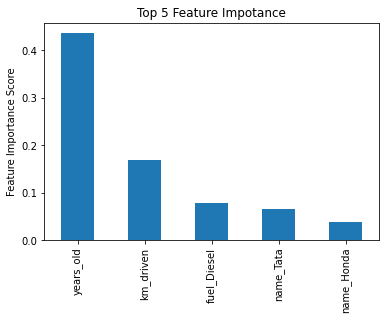

In [36]:
# Feature importance, individual sellers and present price are significant variables

feature_importance = pd.Series(rf_regr.feature_importances_, index=X_train.columns).sort_values(ascending=False).head()
feature_importance.plot(kind = 'bar',title = 'Top 5 Feature Impotance')
plt.ylabel('Feature Importance Score')

In [37]:
# Creating a pickle file for the classifier

filename = 'Model_RandomForestRegressor.pkl'
pickle.dump(rf_regr, open(filename, 'wb'))